In [ ]:
'''


create vertical image STEP 1 : Upload Image → User uploads a food image STEP 2 : Vision Model (eg.. BLIP) creates a caption Example : "a plate filled with fried rice and vegetables" STEP 3 : USDA db will lookup find most similar food item & then extract nutrition fields (calories, protein, fat, carbs, serving info) STEP 4 : Send unstructured Nutritional info to GPT(LLM) , GPT receives : "Unstructured Nutrional values" + your prompt: STEP 5: GPT produces structured nutrition info Example : { "food_name": "Fried Rice", "serving_description": "1 bowl (approx 250g)", "calories": 380, "fat_grams": 12, "protein_grams": 9, "carbs_grams": 50 }


'''

In [ ]:
'''

Because LLaMA models on Groq cannot see images directly..
Groq’s LLaMA models like llama-3.1-8b-instant , llama-3.3-70b-versatile , llama-4-maverick-17b etc.. can do text-only...

So we cannot send images directly :
❌ image → LLaMA
We must convert the image into text first..

Vision based models like (BLIP, CLIP, Vision-GPT) does that job...
Lets use BLIP in this case study..
ie , ⭐ Without BLIP you cannot do this flow

Because LLaMA does not understand pixels, shapes, or images.
BLIP translates pixel data into text that LLaMA can understand.

'''

In [ ]:
'''

BLIP = Bootstrapped Language-Image Pretraining
✔ It is a vision-language model

(meaning it understands both images + text)

✔ It turns images into text descriptions

This is why BLIP is perfect for Groq’s LLaMA models (which are text-only).


'''

In [ ]:
'''

But if we will upload image on ChatGPT/ Gemini , they are able to tell calories ,then how ?

Bcz when you upload an image to ChatGPT or Gemini, they can tell calories
because THEY internally use vision models..

👉 You don’t use vision models yourself
👉 But vision models ARE still being used internally 



'''

In [ ]:
'''

Why not directly sent Image caption to LLM to get nutritional value :


Bcz If you send this directly to an LLM and ask:
“Estimate calories and nutrition”


🚨 Problem 1: LLMs hallucinate numbers

LLMs do not know real nutrition facts.
They generate numbers based on patterns, not truth.

Example:
Ask the same prompt 5 times:

Fried rice calories?
→ 380 kcal
→ 420 kcal
→ 290 kcal
→ 510 kcal
→ 360 kcal


❌ Inconsistent




🚨 Problem 2: LLMs don’t know portion size correctly

Caption:
“a plate of fried rice”

Questions:

How big is the plate?
How much oil?
Which vegetables?
Cooked or raw?
Restaurant or homemade?

    so LLM assumes the nutritional info..
    Thats why we are going to extract nutritional info from USDA db & then structured nutritional info..
    
    
    So here LLM’s role is NOT calculation
    LLM’s role is formatting + reasoning




'''

In [ ]:
'''

⭐ Pipeline in one line :

Image → BLIP → return caption → USDA database lookup → best food match → extract nutrition values → 
send those values to LLM to format → return nutritional info.. 

This is real-world RAG pipeline..

'''

In [ ]:
'''

⭐ This is RAG bcz :

R = Retrieval

You are retrieving/extracting factual data[ie finding best matching food & its real nutrition info] from USDA db based on the BLIP caption.
This is external knowledge..


A = Augmentation
You insert the USDA JSON(nutritional info) into the LLM prompt:
ie , You are augmenting/injecting/sending verified data to LLM..


G = Generation
The LLM generates structured nutrition JSON based on the augmented data.


'''

In [ ]:
'''

⭐ Why BLIP is good here ?

It's local → NO API cost
It's fast
Works on CPU
Very accurate for food
Perfect to pair with Groq LLaMA (text-only)


'''

In [ ]:
'''

🧩 BLIP Models

The most used variants:

1️⃣ BLIP (Captioning model)
Salesforce/blip-image-captioning-base
Salesforce/blip-image-captioning-large


→ Best for simple descriptive captions
→ This is what you are using.



2️⃣ BLIP-2

→ More advanced
→ Can answer questions about the image
→ Often paired with LLaMA too
But heavier.





BLIP (captioning) —
    good, lightweight captioner (what you used).
    Use if you only need a short caption and low cost.

BLIP-2 (captioning + better reasoning) — 
    better captions, can produce more descriptive outputs 
    (better for downstream retrieval and LLM prompting).
    Best drop-in improvement for your pipeline.

CLIP (zero-shot retrieval / classification) — 
    great for matching images to candidate food names (fast, robust). 
    Use it as a classifier: compute image embedding and compare to text embeddings of candidate food names (no caption required)
    


'''

In [ ]:
'''

The exact pipeline becomes :



STEP 1 : Upload Image
        → User uploads a food image


STEP 2 : BLIP creates a caption
        Example BLIP output :
        "a plate filled with fried rice and vegetables"


STEP 3 : USDA db lookup (Retrieval)
        Search into USDA db
        extract nutrition fields (calories, protein, fat, carbs, serving info).
    

STEP 4 : Send Nutritional info to LLaMA(LLM) via Groq , ( Augmentation ) ie inject/send USDA data into prompt..
         LLaMA now receives :
         "Unstructured Nutrional values" + Plus your structured prompt:


STEP 5: LLaMA(LLMs) produces structured nutrition info (ie Generation)
        Example :

        {
          "food_name": "Fried Rice",
          "serving_description": "1 bowl (approx 250g)",
          "calories": 380,
          "fat_grams": 12,
          "protein_grams": 9,
          "carbs_grams": 50,
          "confidence_level": "Medium"
        }


'''

In [ ]:
'''
Q -> why looking into USDA db look up, why not directly sent caption to GPT models ?
Ans-> We must look into the USDA database instead of sending the caption directly to GPT bcz : 


1) LLMs can HALLUCINATE nutrition values , ie they are not trustworthy

    If you send this to LLaMA:

    “a plate of fried rice”
    Estimate calories.
    The model will GUESS something like:

    380 calories

    Send the same caption:

    “fried rice”
    Estimate calories in JSON.”

    Run 5 times — you’ll get:

    350
    420
    280
    510
    390
    ie , LLM answers = inconsistent
    But USDA answers = consistent
    
    See In real apps (fitness, health, diet, medical), these hallucinated numbers = unacceptable...
    
    
    
    2) USDA database gives TRUE NUTRITION FACTS

    USDA has:

    Exact calories
    Exact fat
    Exact protein
    Exact carbs
    Exact serving sizes
    Lab-tested and verified data

    When you do the lookup:
    BLIP caption → "fried rice" -> have verified nutrition values



    3) USDA O/P might be unstructured — 
        Thats why , we will use LLM to fix format..

'''

# 1(a ) Install (run once)

In [1]:
! pip install -U transformers torch torchvision pillow pandas

   ---------------------------------------- 0.0/12.0 MB ? eta -:--:--
   --- ------------------------------------ 1.0/12.0 MB 12.5 MB/s eta 0:00:01
   -------- ------------------------------- 2.6/12.0 MB 6.0 MB/s eta 0:00:02
   -------------------- ------------------- 6.3/12.0 MB 11.0 MB/s eta 0:00:01
   ------------------------ --------------- 7.3/12.0 MB 8.9 MB/s eta 0:00:01
   --------------------------- ------------ 8.1/12.0 MB 7.9 MB/s eta 0:00:01
   ---------------------------------------- 12.0/12.0 MB 10.0 MB/s  0:00:01
  Attempting uninstall: transformers
    Found existing installation: transformers 4.57.1
    Uninstalling transformers-4.57.1:
      Successfully uninstalled transformers-4.57.1


In [1]:
# Run in a notebook cell (prefix with !). If already installed, you can skip.
! pip install -U transformers torch torchvision pillow pandas

   ---------------------------------------- 0.0/12.0 MB ? eta -:--:--
   ------------------- -------------------- 5.8/12.0 MB 32.0 MB/s eta 0:00:01
   -------------------------------- ------- 9.7/12.0 MB 25.2 MB/s eta 0:00:01
   ---------------------------------------- 12.0/12.0 MB 22.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ------------------ --------------------- 5.0/11.0 MB 23.2 MB/s eta 0:00:01
   -------------------------------- ------- 8.9/11.0 MB 22.1 MB/s eta 0:00:01
   ---------------------------------------- 11.0/11.0 MB 20.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   ---------------------------------------- 2.7/2.7 MB 25.7 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.21.4
    Un

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
streamlit 1.37.1 requires pillow<11,>=7.1.0, but you have pillow 12.0.0 which is incompatible.


In [ ]:
'''

Installing collected packages: pandas, tokenizers, transformers
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.21.4
    Uninstalling tokenizers-0.21.4:
      Successfully uninstalled tokenizers-0.21.4
  Attempting uninstall: transformers
    Found existing installation: transformers 4.55.4
    Uninstalling transformers-4.55.4:
      Successfully uninstalled transformers-4.55.4
Successfully installed pandas-2.3.3 tokenizers-0.22.1 transformers-4.57.1


'''

# Step 1) Load / Import image !

In [1]:
from PIL import Image

In [2]:
IMAGE_PATH = r"C:\Users\shant\_14.. Entire_GenAI_Projects\Module 2 - Vision GPT\images\pizza_slice.png"

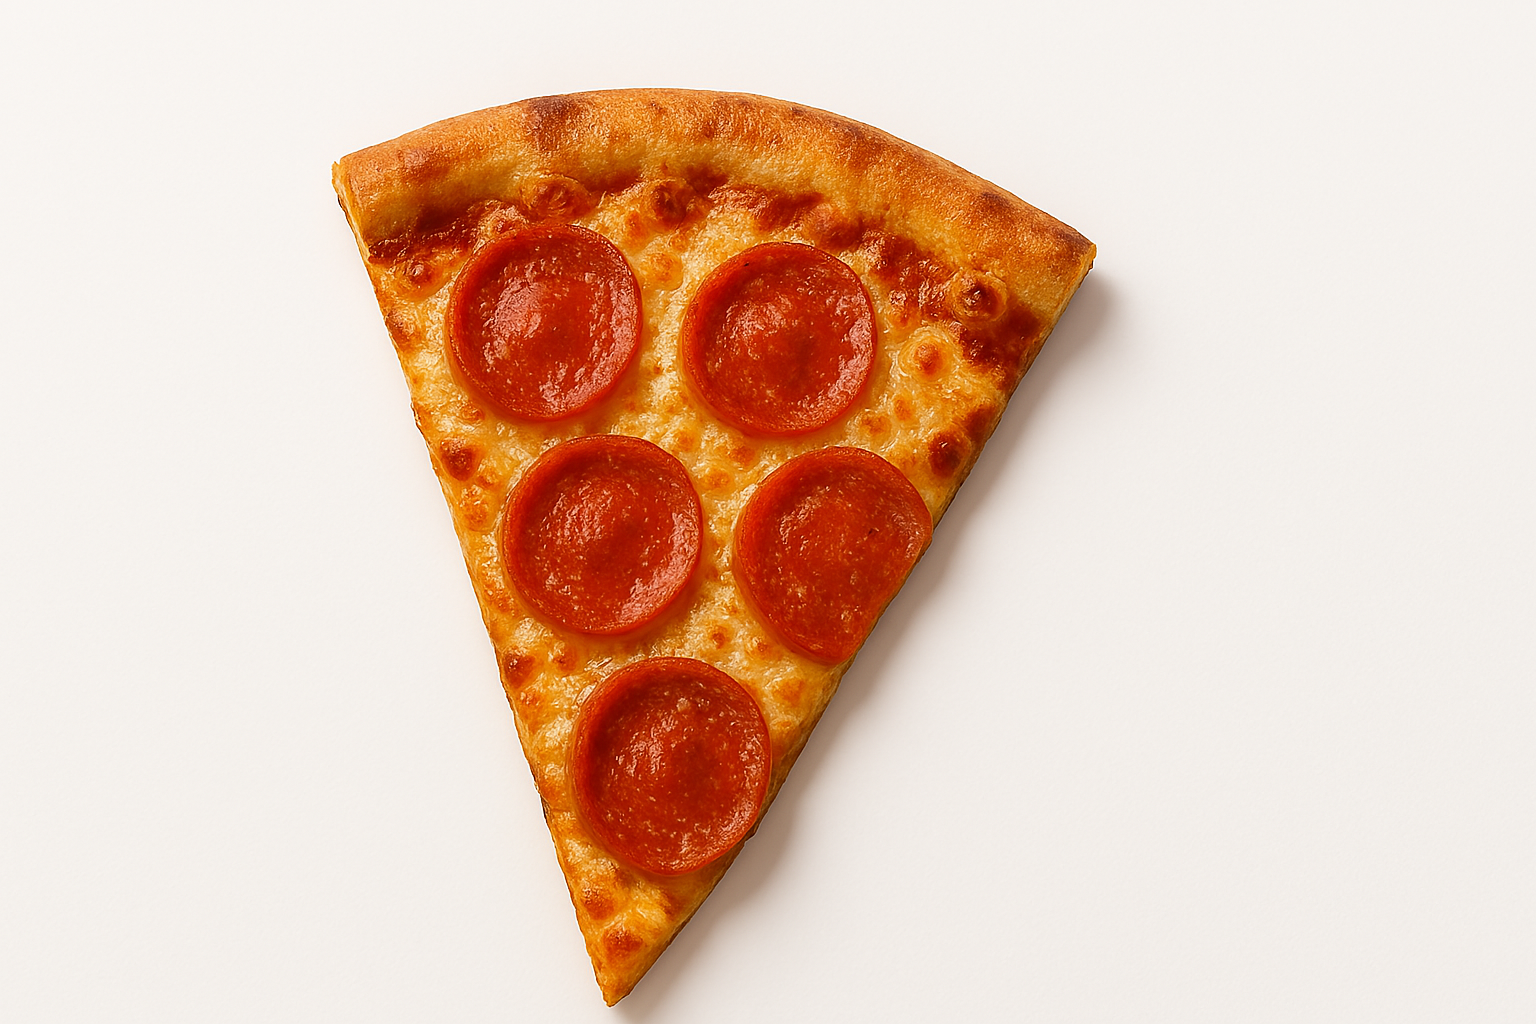

In [3]:
img = Image.open(IMAGE_PATH)
img

In [4]:
img.size

(1536, 1024)

In [ ]:
'''

So your image is:

Width: 1536 pixels
Height: 1024 pixels


1536 px  ───────────────▶
┌──────────────────────────────┐
│                              │
│          IMAGE               │  1024 px
│                              │
└──────────────────────────────┘
              ▼



'''

# Step 2 — Create Image Caption using BLIP !

In [ ]:
'''

1 ) BLIP uses two main components :

    I ) Vision Encoder (ViT) → looks at the image , ie encoder = (image → embeddings)
    II ) Text Decoder (Transformer LM) → writes the caption , ie decoder = (embeddings → caption)



2 ) Vision Encoder will convert image into embeddings :

The image is:

split into patches / cut into small pieces
converted into vectors/numbers
encoded into visual feature embeddings/turned into image features

ie , BLIP converts the picture into something the language model can understand.




3 ) The decoder uses embeddings/those image features to write a caption

The Transformer decoder:

looks at the image features/embedding
generates words one-by-one
uses attention to decide which part of the image each word describes


ie "a" → "plate" → "of" → "fried" → "rice"


BLIP = see image → convert to features using Encoder → write caption word by word using Decoder..




📌 In one sentence:
BLIP converts images → embeddings → uses a text decoder → generates captions word-by-word, 
                        trained using matching + generation tasks..


'''

In [ ]:
'''
🧩 BLIP Models

The most used variants :

1️⃣ BLIP (Captioning model)
Salesforce/blip-image-captioning-base
Salesforce/blip-image-captioning-large


→ Best for simple descriptive captions
→ This is what you are using.


'''

In [ ]:
# load BLIP processor + model (downloads first time)

In [5]:
from transformers import BlipProcessor, BlipForConditionalGeneration

In [6]:
## Load the pre-trained BLIP processor that knows how to prepare images for BLIP captioning

processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


In [ ]:
'''

1) Meaning of from_pretrained

BLIP is already trained on millions of images + captions
You don’t train it again

from_pretrained simply downloads and loads the ready-made model




2) Why 'Salesforce/blip-image-captioning-base'

This is the model name on Hugging Face
Salesforce released multiple BLIP versions:

"blip-image-captioning-base" → small, fast
"blip-image-captioning-large" → bigger, more accurate



3) What the BLIP Processor does

It prepares the image/text so the BLIP model can understand it:
resizes the image
normalizes pixel values
converts image → tensors
converts text → tokens
formats everything correctly

So this line means:

“Load the pre-trained BLIP processor that knows how to prepare images for BLIP captioning.”


'''

In [7]:
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")

In [ ]:
'''

⭐ Simple Meaning :

This line loads the actual BLIP captioning model that generates the words of the caption.
Whereas the processor prepares the image…

👉 this model is the brain that writes the caption...
This class contains:
    I ) encoder = (image → embeddings)
    II ) decoder = (embeddings → caption)


'''

In [ ]:
## create Caption using BLIP !

In [8]:
out = model.generate(**processor(images = img , return_tensors = "pt"))
caption = processor.decode(out[0] , skip_special_tokens = True)
print(caption)

a slice of pizza


In [ ]:
'''

⭐ Simple Meaning (Easy Explanation) :


1) processor(...)
Turns the image into tensors the model can understand..

2) model.generate(...)
BLIP writes a caption (predicts words).

3) processor.decode(...)
Turns the model’s output IDs back into readable text.


'''

In [ ]:
'''

⭐ Simple Meaning (Easy Explanation) :


1) processor(...)
    Turns the image into tensors/numbers that our GenAI model can understand..
    bcz they dont understand image
    
    tensor([1, 3, 384, 384] tells [1 image , RGB channel , height , width]
    
    
    
    (A) processor(...)

    Takes your image (img)
    Resizes it
    Normalizes pixels
    Converts it into PyTorch tensors (pt)

    Returns a dictionary like:
    {"pixel_values": tensor(...)}



2) model.generate(...)
    BLIP writes a caption (in token IDs)..

    Takes those pixel values
    It uses :
        Vision encoder (understands image)
        Text decoder (writes words)
    Returns a tensor of token IDs (not text)

    Example of out :
    tensor([[101, 1037, 3219, 1999, 1037, 2463, 102]])

    This is the caption but in ID format.



3) processor.decode(...)
    Purpose: Turn token IDs → real words.

    This converts the ID numbers into real words.
    Example:
    [101, 1037, 3219, 1999, 1037, 2463, 102]


    becomes:
    "a plate with fried rice"




⭐ In One Line

processor prepares image → model.generate produces token IDs → decode turns IDs into caption text.


'''

                ┌──────────────────────────────┐
                │          Your Image          │
                │     (e.g., fried rice)       │
                └───────────────┬──────────────┘
                                │
                                ▼
                  ┌────────────────────────┐
                  │   1) Processor(...)     │
                  │  - resize image         │
                  │  - normalize pixels     │
                  │  - convert → tensors    │
                  └──────────────┬─────────┘
                                 │  pixel_values
                                 ▼
                   ┌─────────────────────────┐
                   │   2) model.generate()    │
                   │  Vision Encoder          │
                   │  → understands image     │
                   │                          │
                   │  Text Decoder            │
                   │  → writes words          │
                   └──────────────┬──────────┘
                                  │  token IDs
                                  ▼
                   ┌─────────────────────────┐
                   │   3) processor.decode()  │
                   │  - convert IDs → text    │
                   │  - final caption         │
                   └──────────────┬──────────┘
                                  │
                                  ▼
                        "a plate with fried rice"


# Step 3 : What is RAG ? 

In [ ]:
'''

⭐ This is RAG bcz :

R = Retrieval

You are retrieving/extracting factual data[ie finding best matching food & its real nutrition info] from USDA db based on the BLIP caption.
This is external knowledge..


A = Augmentation
You insert the USDA JSON(nutritional info) into the LLM prompt:
ie , You are augmenting/injecting/sending verified data to LLM..


G = Generation
The LLM generates structured nutrition JSON based on the augmented data.


'''

In [ ]:
'''
Q -> why looking into USDA db look up, why not directly sent caption to GPT models ?
Ans-> We must look into the USDA database instead of sending the caption directly to GPT bcz : 


1) LLMs can HALLUCINATE nutrition values , ie they are not trustworthy

    If you send this to LLaMA:

    “a plate of fried rice”
    Estimate calories.
    The model will GUESS something like:

    380 calories

    Send the same caption:

    “fried rice”
    Estimate calories in JSON.”

    Run 5 times — you’ll get:

    350
    420
    280
    510
    390
    ie , LLM answers = inconsistent
    But USDA answers = consistent
    
    See In real apps (fitness, health, diet, medical), these hallucinated numbers = unacceptable...
    
    
    
    2) USDA database gives TRUE NUTRITION FACTS

    USDA has:

    Exact calories
    Exact fat
    Exact protein
    Exact carbs
    Exact serving sizes
    Lab-tested and verified data

    When you do the lookup:
    BLIP caption → "fried rice" -> have verified nutrition values



    3) USDA O/P might be unstructured — 
        Thats why , we will use LLM to fix format..
        
        
    This is exactly why RAG improves accuracy and trust in GenAI systems.

'''

# Step 4 : RAG Stage 1 : USDA db lookup (Retrieval)

In [ ]:
'''


👉 USDA DB lookup (Retrieval) is data collection,
    but specifically inside the RAG pipeline, which itself belongs to Model Adaptation & Alignment
    
    
    🧠 Two Types of Data Collection in GenAI
        1️⃣ Global Data Collection (Project Level)

            Happens before the model runs

            Examples:

            Scraping job websites
            Uploading PDFs
            Collecting product catalogs

            Purpose:
            Prepare knowledge ahead of time

            GenAI Life Cycle Stage:
            👉 Data Collection




        2️⃣ RAG Retrieval (Runtime Data Collection) ✅
        
            We do retrieval in RAG so that LLM uses real or verified facts/data..
            Happens while the model is answering a query

            Examples:

            Searching USDA database
            Fetching live nutrition data

            GenAI Life Cycle Stage:
            👉 Model Adaptation (RAG – Retrieval)




'''

In [ ]:
'''

When to use what DB ?


USDA 
    mostly American & raw foods

OpenFoodFacts (Best FREE + Global + Simple API) :: 
    Works better for Indian foods, packaged foods, snacks

Edamam Nutrition API (Best Paid)
    If you want CLEAN OUTPUT + very accurate → Edamam
    Perfect for production apps.

Nutritionix
    Good for US-ready-to-eat foods
    ✔ Has branded restaurants (McDonalds, Subway)

'''

In [ ]:
'''

✅ What is USDA?
USDA = United States Department of Agriculture..
USDA provides free API access to :

calories
protein
carbs
fat
vitamins
minerals
serving weights
categories
branded food items



'''

In [9]:
import requests

API_KEY = "UlXjEYyqdECmlQQTJ4RVD6gNTQ8DOBkhkdhhznVp"

query = "a slice of pizza"

url = f"https://api.nal.usda.gov/fdc/v1/foods/search?query={query}&api_key={API_KEY}"
resp = requests.get(url).json()


In [10]:
item = resp["foods"][0]

print(item["description"])

Dessert pizza


In [11]:
print(item["foodNutrients"])

[{'nutrientId': 1003, 'nutrientName': 'Protein', 'nutrientNumber': '203', 'unitName': 'G', 'value': 1.84, 'rank': 600, 'indentLevel': 1, 'foodNutrientId': 34306719}, {'nutrientId': 1004, 'nutrientName': 'Total lipid (fat)', 'nutrientNumber': '204', 'unitName': 'G', 'value': 7.53, 'rank': 800, 'indentLevel': 1, 'foodNutrientId': 34306720}, {'nutrientId': 1005, 'nutrientName': 'Carbohydrate, by difference', 'nutrientNumber': '205', 'unitName': 'G', 'value': 32.38, 'rank': 1110, 'indentLevel': 2, 'foodNutrientId': 34306721}, {'nutrientId': 1008, 'nutrientName': 'Energy', 'nutrientNumber': '208', 'unitName': 'KCAL', 'value': 204, 'rank': 300, 'indentLevel': 1, 'foodNutrientId': 34306722}, {'nutrientId': 1018, 'nutrientName': 'Alcohol, ethyl', 'nutrientNumber': '221', 'unitName': 'G', 'value': 0, 'rank': 18200, 'indentLevel': 1, 'foodNutrientId': 34306723}, {'nutrientId': 1051, 'nutrientName': 'Water', 'nutrientNumber': '255', 'unitName': 'G', 'value': 57.63, 'rank': 100, 'indentLevel': 1, 

In [ ]:
### But when u have caption as "bowl of vegetables" , USDA db is not working well !
## ie , it will not return good match !

In [12]:
caption = "bowl of vegetables"

url = f"https://api.nal.usda.gov/fdc/v1/foods/search?query={caption}&api_key={API_KEY}"
resp = requests.get(url).json()

In [13]:
item = resp["foods"][0]

print(item["description"])

Burrito bowl, chicken


In [ ]:
'''

if BLIP return caption as "bowl of vegetables"  , but in USDA db lookup , we will get "Burrito bowl, chicken"..
Why ??
    Bcz generic words like "bowl" + broad terms like "vegetables" often match many items 
    (including burrito bowl, chicken bowl, or branded entries)

'''

# Step 5 : Performing Similarity search using Cosine Similarity..

In [ ]:
'''

Create vector representation of our cleaned query :
slice of pizza : [ 0.12 , 0.23 , 0.45 -----]
ie on slice of pizza , we will apply embeddings & we will have [ 0.12 , 0.23 , 0.45 -----]


We will do query search with pagesize=50 (ie 50 items we have ) & create its vector representation
by applying embeddings..


Then compute similarity scores using Cosine Similarity & find Top 5..


'''

In [ ]:
'''

How to handle it ?

We will use (embedding re-ranking + top-k UX) — why to use it ?? 

"bowl" is a generic token; embeddings treat whole phrase semantically, 
and the nearest description will be actual vegetable items rather than burrito/chicken bowls..


'''

In [ ]:
'''

queries USDA with pageSize=50
computes embeddings with sentence-transformers
re-ranks candidates/food items by computing distance [cosine similarity]
prints top-5 matches


'''

In [ ]:
'''


Image → BLIP → Caption → USDA search (pageSize=50)
→ Perform Embedding using Sentence Transformers → Compute similarity scores using Cosine Similarity → Find Top 5 Food items
→ Select best food item → Fetch Full USDA Details → Return calories, protein, fat, carbs (scaled by serving size) using LLM


'''

'''

            ┌────────────────────┐
            │      Image         │
            └─────────┬──────────┘
                      │
                      ▼
            ┌──────────────────────────────┐
            │  BLIP return text as         │
            │  "bowl of veg..."            │
            └─────────┬────────────────────┘
                      │
                      ▼
        ┌─────────────────────────────┐
        │  Caption Cleaning           │
        │  remove: bowl, with, of...  │
        │  → "vegetables"             │
        └──────────┬──────────────────┘
                   │
                   ▼
      ┌────────────────────────────────┐
      │ USDA Search (pageSize = 50)    │
      │ get many candidate foods       │
      └────────────┬───────────────────┘
                   │
                   ▼
     ┌──────────────────────────────────────┐
     │ Perform Embeddings using Sentence    │
     │ Transformers (all-MiniLM-L6-v2) model│
     │ ie , we will get                     │
     │ query_emb                            │
     │ descriptions_emb                     │
     │                                      │
     │                                      │
     └────────────┬─────────────────────────┘
                  │
                  ▼
      ┌─────────────────────────────────┐
      │  Compute similarity scores      │
      │  using Cosine Similarity        │
      │  Find Top 5                     │
      └─────────────┬───────────────────┘
                    │
         
                    │
                    ▼
     ┌──────────────────────────────────┐
     │ Fetch Full USDA Details (fdcId)  │
     └──────────────────┬───────────────┘
                         │
                         ▼
        ┌────────────────────────────────┐
        │  Extract Nutrients (per 100g)  │
        │  - calories                    │
        │  - protein                     │
        │  - fat                         │
        │  - carbs                       │
        └──────────────┬─────────────────┘
                       │ Scale based on
                       │ serving weight
                       ▼
          ┌─────────────────────────┐
          │     Final Nutrition     │
          │ {calories, protein,...} │
          └─────────────────────────┘




'''

In [ ]:
'''

| Step                       | What You Did               | RAG Component         |
| -------------------------- | -------------------------- | --------------------- |
| Image → BLIP caption       | Extracted query            | Pre-processing        |
| Caption → USDA lookup      | Fetch factual data         | **Retrieval**         |
| Best match selection       | Embedding similarity       | **Retrieval ranking** |
| Inject USDA JSON → LLM     | Add factual data to prompt | **Augmentation**      |
| LLM returns nutrition JSON | Final answer               | **Generation**        |


'''

In [41]:
!pip install sentence-transformers requests transformers Pillow

  Using cached sentence_transformers-5.1.2-py3-none-any.whl.metadata (16 kB)
Using cached sentence_transformers-5.1.2-py3-none-any.whl (488 kB)
   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   -------------- ------------------------- 3.1/8.7 MB 16.8 MB/s eta 0:00:01
   ---------------------------------------  8.7/8.7 MB 22.4 MB/s eta 0:00:01
   ---------------------------------------- 8.7/8.7 MB 21.7 MB/s  0:00:00
   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   - -------------------------------------- 1.8/38.6 MB 8.4 MB/s eta 0:00:05
   ------- -------------------------------- 7.6/38.6 MB 18.8 MB/s eta 0:00:02
   ----------- ---------------------------- 11.5/38.6 MB 19.0 MB/s eta 0:00:02
   ---------------- ----------------------- 16.0/38.6 MB 19.0 MB/s eta 0:00:02
   -------------------- ------------------- 19.9/38.6 MB 19.1 MB/s eta 0:00:01
   ------------------------- -------------- 24.1/38.6 MB 19.3 MB/s eta 0:00:01
   ---------------

## (I) clean generic tokens (optional)

In [14]:
caption = "bowl of vegetables"   # replace with BLIP caption variable from your flow

In [15]:
stopwords = {"bowl","plate","with","of","a","an","dish"}

In [16]:
clean_query = " ".join([t for t in caption.lower().split() if t not in stopwords]).strip()
clean_query

'vegetables'

## (II) retrieve many USDA candidates/food items !

In [ ]:
## !pip install requests

In [17]:
import requests

In [18]:

USDA_API_KEY = "UlXjEYyqdECmlQQTJ4RVD6gNTQ8DOBkhkdhhznVp"

url = f"https://api.nal.usda.gov/fdc/v1/foods/search?query={requests.utils.requote_uri(clean_query)}&pageSize=50&api_key={USDA_API_KEY}"

resp = requests.get(url)
data = resp.json()


## Lets retrieve 50 candidates → so that results are more accurate & we can re-rank with embeddings..
## 🔥 Want even BETTER accuracy?

## You can set : pageSize = 100 or pageSize = 200
## But 50 is a good balance between performance + accuracy.

In [19]:
data

{'totalHits': 107115,
 'currentPage': 1,
 'totalPages': 2143,
 'pageList': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 'foodSearchCriteria': {'query': 'vegetables',
  'generalSearchInput': 'vegetables',
  'pageNumber': 1,
  'numberOfResultsPerPage': 50,
  'pageSize': 50,
  'requireAllWords': False},
 'foods': [{'fdcId': 172284,
   'description': 'Babyfood, vegetables, garden vegetable, strained',
   'commonNames': '',
   'additionalDescriptions': '',
   'dataType': 'SR Legacy',
   'ndbNumber': 3283,
   'publishedDate': '2019-04-01',
   'foodCategory': 'Baby Foods',
   'allHighlightFields': '',
   'score': 319.7495,
   'microbes': [],
   'foodNutrients': [{'nutrientId': 1186,
     'nutrientName': 'Folic acid',
     'nutrientNumber': '431',
     'unitName': 'UG',
     'derivationCode': 'Z',
     'derivationDescription': 'Assumed zero (Insignificant amount or not naturally occurring in a food, such as fiber in meat)',
     'derivationId': 68,
     'value': 0.0,
     'foodNutrientSourceId': 5,
     

In [20]:
candidates = data.get("foods", []) ## dict.get(key, default)
candidates

## dict.get(key, default)
## [] => If no foods were returned, give me an empty list so program doesn't break."

[{'fdcId': 172284,
  'description': 'Babyfood, vegetables, garden vegetable, strained',
  'commonNames': '',
  'additionalDescriptions': '',
  'dataType': 'SR Legacy',
  'ndbNumber': 3283,
  'publishedDate': '2019-04-01',
  'foodCategory': 'Baby Foods',
  'allHighlightFields': '',
  'score': 319.7495,
  'microbes': [],
  'foodNutrients': [{'nutrientId': 1186,
    'nutrientName': 'Folic acid',
    'nutrientNumber': '431',
    'unitName': 'UG',
    'derivationCode': 'Z',
    'derivationDescription': 'Assumed zero (Insignificant amount or not naturally occurring in a food, such as fiber in meat)',
    'derivationId': 68,
    'value': 0.0,
    'foodNutrientSourceId': 5,
    'foodNutrientSourceCode': '7',
    'foodNutrientSourceDescription': 'Assumed zero',
    'rank': 7000,
    'indentLevel': 0,
    'foodNutrientId': 1682822,
    'dataPoints': 0},
   {'nutrientId': 1258,
    'nutrientName': 'Fatty acids, total saturated',
    'nutrientNumber': '606',
    'unitName': 'G',
    'value': 0.035

In [ ]:
'''

Important top-level keys you’ll see in each item :

fdcId(Food Data Central ID) — unique USDA id for this food (use this to fetch full detail).
    A unique number for every food in the USDA Nutrition Database.
    Example:
    "fdcId": 2710101 → Vegetables, pickled
    "fdcId": 172284 → Babyfood, vegetables
    
    Think of fdcId like :
    Roll number for a student
    
    
description — human-readable name , ie "Babyfood, vegetables, garden vegetable, strained".
dataType  — where record comes from (SR Legacy, FNDDS, Branded, etc.).
foodCategory - Category of Food !
score — search relevance score returned by USDA (higher = more relevant to query).

foodNutrients — list of nutrient entries (this is the key block for calories/macros).
foodPortions (sometimes in detail) — suggested serving sizes with gramWeight (useful to scale).
inputFoods / foodAttributes / publicationDate — metadata/ingredients/category info.
derivationDescription (inside nutrient) — tells how USDA estimated the value (



Each element in foodNutrients is a dict describing one nutrient. In your paste the shape is like:

{
  "nutrientId": 1008,
  "nutrientName": "Energy",
  "unitName": "KCAL",
  "value": 32.0,
  ...
}


'''

In [21]:
len(candidates)

50

## (III) build list of descriptions !

In [22]:
texts = [] 
ids = []

for item in candidates:
    desc = item["description"]
    texts.append(desc)
    ids.append(item.get("fdcId"))


In [ ]:
'''

✅ Why store texts ?
So that later-on , we will have vector representation of these food name by applying embeddings...  :
Then , The model compares your query to every description


✅ Why store ids?

Because after we find the best description, we need the fdcId to fetch the full nutrition.
ie , We store ids to later fetch the full nutrition of the selected item.

'''

In [23]:
texts

['Babyfood, vegetables, garden vegetable, strained',
 'Babyfood, vegetables, mix vegetables junior',
 'Babyfood, vegetables, mix vegetables strained',
 'Biryani with vegetables',
 'Vegetable chips',
 'Bread, vegetable',
 'Congee, with vegetables',
 'Fajita, vegetable',
 'Quesadilla, with vegetables',
 'Soup, vegetable',
 'Stew, vegetable',
 'Vegetable curry',
 'Vegetable smoothie',
 'Vegetable tempura',
 'Vegetables, pickled',
 'Snacks, vegetable chips, made from garden vegetables',
 'Mixed vegetable juice',
 'Bread, vegetable, toasted',
 'Pasta, vegetable, cooked',
 'Babyfood, crackers, vegetable',
 'Bacon, for use with vegetables',
 'Beef, for use with vegetables',
 'Cheese, cottage, with vegetables',
 'Cheese, cottage, with vegetables',
 'Cheese, processed, with vegetables',
 'Chicken, for use with vegetables',
 'Cucumber and vegetable namasu',
 'Dressing with meat and vegetables',
 'Empanada, beef, with vegetables',
 'Empanada, chicken, with vegetables',
 'Gelatin salad with vegeta

In [24]:
ids

[172284,
 172283,
 173515,
 2708985,
 2709447,
 2707650,
 2708983,
 2708607,
 2708594,
 2710113,
 2710063,
 2710067,
 2710152,
 2710065,
 2710101,
 174796,
 2709810,
 2707651,
 2708351,
 170972,
 2710239,
 2710241,
 169078,
 2705752,
 2705771,
 2710242,
 2709818,
 2708749,
 2708712,
 2708714,
 2710312,
 2710245,
 2710240,
 2708759,
 2708596,
 2709763,
 2707430,
 2710109,
 2710111,
 2710116,
 2708966,
 2710068,
 2705628,
 2705627,
 2710038,
 2710180,
 2709134,
 2709132,
 2709136,
 2710810]

##  (IV) Perform Embedding using sentence-transformers !

In [ ]:
## !pip install sentence-transformers transformers Pillow

In [25]:
from sentence_transformers import SentenceTransformer, util

In [26]:
model = SentenceTransformer("all-MiniLM-L6-v2")  # small & fast
query_emb = model.encode(clean_query , convert_to_tensor = True)
texts_emb = model.encode(texts , convert_to_tensor = True)


In [27]:
'''

model = SentenceTransformer("all-MiniLM-L6-v2")
This model converts sentences into numerical vectors


query_emb = model.encode(clean_query, convert_to_tensor = True)

convert "vegetables" into a numerical embedding.. , ie 
"vegetables" → [0.23, -0.55, 1.12, ...]



texts_emb = model.encode(texts , convert_to_tensor = True)

ie . it will convert USDA descriptions into vectors :

"Vegetables, pickled" → [0.21, -0.49, 1.08, ...]
"Soup, vegetable"     → [0.11, -0.30, 1.40, ...]
"Stew, vegetable"     → [0.51, -0.65, 0.98, ...]




🎯 Why do we need these vectors?

    Because now we can compute similarity scores between :
    similarity = util.cos_sim(query_emb, texts_emb)

'''

'\n\nmodel = SentenceTransformer("all-MiniLM-L6-v2")\nThis model converts sentences into numerical vectors\n\n\nquery_emb = model.encode(clean_query, convert_to_tensor = True)\n\nconvert "vegetables" into a numerical embedding.. , ie \n"vegetables" → [0.23, -0.55, 1.12, ...]\n\n\n\ntexts_emb = model.encode(texts , convert_to_tensor = True)\n\nie . it will convert USDA descriptions into vectors :\n\n"Vegetables, pickled" → [0.21, -0.49, 1.08, ...]\n"Soup, vegetable"     → [0.11, -0.30, 1.40, ...]\n"Stew, vegetable"     → [0.51, -0.65, 0.98, ...]\n\n\n\n\n🎯 Why do we need these vectors?\n\n    Because now we can compute similarity scores between :\n    similarity = util.cos_sim(query_emb, texts_emb)\n\n'

In [28]:
clean_query

'vegetables'

In [29]:
query_emb

### This vector represents "vegetables" in embedding space..

tensor([-2.6963e-02,  1.8918e-02, -5.4494e-02,  8.3278e-02,  1.5622e-02,
        -1.4131e-02,  3.9484e-02, -1.8671e-02,  2.5543e-02, -1.6384e-02,
         7.3125e-02, -8.0227e-02,  1.2253e-02, -4.2933e-02, -2.1748e-02,
        -2.0396e-02,  7.9466e-02,  7.7693e-02, -1.0446e-01, -8.3677e-02,
        -9.5245e-02,  4.4938e-02,  2.1041e-02, -1.5606e-02,  2.4461e-02,
        -3.6015e-02, -7.5062e-02,  1.8233e-02, -4.0398e-02, -1.1546e-01,
         4.0401e-02,  2.7590e-02, -1.4270e-02,  3.7562e-02, -3.1032e-02,
         3.8133e-02,  3.0635e-02, -1.0583e-01,  1.5538e-02, -5.1799e-02,
         4.1957e-02, -1.1036e-01,  1.4634e-02, -3.3418e-02,  1.6133e-02,
         3.5563e-02, -7.7881e-02,  2.5793e-02,  2.6399e-03, -4.3252e-02,
        -1.2926e-02,  1.1602e-02, -9.3341e-02, -1.8539e-02,  7.1001e-03,
        -3.8172e-02, -2.1143e-02,  3.0083e-02,  7.5107e-02,  1.8731e-02,
         7.8933e-02, -4.3435e-02,  6.3389e-03,  2.3446e-02, -7.9127e-02,
        -5.2768e-02, -4.8446e-02,  5.8609e-03, -2.1

##  (V) compute cosine similarities and rank !

In [30]:
cos_scores = util.cos_sim(query_emb, texts_emb)[0].cpu().numpy()
## util.cos_sim(query_emb, texts_emb).cpu().numpy()[0]

cos_scores

array([0.64667815, 0.6662008 , 0.6187948 , 0.5647267 , 0.6636775 ,
       0.70340604, 0.6530142 , 0.53554523, 0.62006265, 0.6839339 ,
       0.68329257, 0.58537316, 0.5308303 , 0.5385087 , 0.73848873,
       0.6653783 , 0.5550549 , 0.58881027, 0.5872279 , 0.6597251 ,
       0.5916707 , 0.61614335, 0.59930736, 0.59930736, 0.6731218 ,
       0.6475347 , 0.6100656 , 0.5586902 , 0.5386616 , 0.5521973 ,
       0.517586  , 0.5808714 , 0.5079551 , 0.48547027, 0.61718255,
       0.6053668 , 0.47703102, 0.5542351 , 0.6295206 , 0.5977611 ,
       0.5340292 , 0.47630635, 0.5261604 , 0.5016446 , 0.5885547 ,
       0.47389594, 0.48398334, 0.49333093, 0.48756644, 0.6304767 ],
      dtype=float32)

In [ ]:
'''

cos_scores is a list of cosine similarity values between :

(1) your cleaned query embedding  
            vs  
(2) each USDA food description embedding

ie , How close is “vegetables” to each USDA food description


util.cos_sim() returns a PyTorch tensor..
NumPy cannot convert GPU tensors
Thats why :
    from GPU memory → CPU memory [.cpu()]
    then converts to numpy array [.numpy()]

'''

In [31]:
cos_scores.argsort()

## argsort() sorts in ASCENDING order (lowest → highest)

array([45, 41, 36, 46, 33, 48, 47, 43, 32, 30, 42, 12, 40,  7, 13, 28, 29,
       37, 16, 27,  3, 31, 11, 18, 44, 17, 20, 39, 23, 22, 35, 26, 21, 34,
        2,  8, 38, 49,  0, 25,  6, 19,  4, 15,  1, 24, 10,  9,  5, 14])

In [32]:
cos_scores.argsort()[::-1] ## [::-1] → reverse it (big → small)

## [::-1] -> Descending order !

array([14,  5,  9, 10, 24,  1, 15,  4, 19,  6, 25,  0, 49, 38,  8,  2, 34,
       21, 26, 35, 22, 23, 39, 20, 17, 44, 18, 11, 31,  3, 27, 16, 37, 29,
       28, 13,  7, 40, 12, 42, 30, 32, 43, 47, 48, 33, 46, 36, 41, 45])

In [33]:
cos_scores.argsort()[::-1][:5] ## [:5] → take top 5

array([14,  5,  9, 10, 24])

In [34]:
top_idx = cos_scores.argsort()[::-1][:5] 
top_idx

array([14,  5,  9, 10, 24])

In [35]:
## get indices of the Top 5 most similar items..

top_idx = cos_scores.argsort()[::-1][:5] 
top_idx

array([14,  5,  9, 10, 24])

In [ ]:
'''
If cos_scores = [0.3, 0.8, 0.6]
cos_scores.argsort() → [0 , 2 , 1]

cos_scores.argsort()[::-1] → [1 , 2 , 0]


NumPy’s argsort() sorts in ASCENDING order (lowest → highest)


BUT:

❗️We want DESCENDING order (highest → lowest)
Because in cosine similarity:

higher score = more similar
lower score = less similar


0.80 = best match  
0.70  
0.50  
0.20 = worst match


So [::-1] forces NumPy to sort in descending order.


'''

In [36]:
enumerate(top_idx, start = 1)

In [37]:
cos_scores[14]

np.float32(0.73848873)

In [38]:
print("Top matches by embedding similarity:")

for rank, index in enumerate(top_idx, start = 1):
    score = float(cos_scores[index])
    print("{}. {}  (score: {:.4f})  fdcId: {}".format(rank, texts[index], score, ids[index]))


Top matches by embedding similarity:
1. Vegetables, pickled  (score: 0.7385)  fdcId: 2710101
2. Bread, vegetable  (score: 0.7034)  fdcId: 2707650
3. Soup, vegetable  (score: 0.6839)  fdcId: 2710113
4. Stew, vegetable  (score: 0.6833)  fdcId: 2710063
5. Cheese, processed, with vegetables  (score: 0.6731)  fdcId: 2705771


In [39]:
top_idx[0]

np.int64(14)

In [40]:
# assume top_idx and ids and texts and cos_scores exist from your previous code !

best_index = top_idx[0]
best_fdc = ids[best_index]
best_desc = texts[best_index]
best_score = float(cos_scores[best_index])

print("Best match:", best_desc, "fdcId:", best_fdc, "Best_score:", best_score)

Best match: Vegetables, pickled fdcId: 2710101 Best_score: 0.7384887337684631


In [41]:
# fetch full USDA food details for that fdcId !

detail_url = f"https://api.nal.usda.gov/fdc/v1/food/{best_fdc}?api_key={USDA_API_KEY}"
detail_resp = requests.get(detail_url)
detail = detail_resp.json()

In [42]:
detail

{'foodClass': 'Survey',
 'description': 'Vegetables, pickled',
 'foodNutrients': [{'type': 'FoodNutrient',
   'id': 34442764,
   'nutrient': {'id': 1003,
    'number': '203',
    'name': 'Protein',
    'rank': 600,
    'unitName': 'g'},
   'amount': 0.94},
  {'type': 'FoodNutrient',
   'id': 34442765,
   'nutrient': {'id': 1004,
    'number': '204',
    'name': 'Total lipid (fat)',
    'rank': 800,
    'unitName': 'g'},
   'amount': 0.21},
  {'type': 'FoodNutrient',
   'id': 34442766,
   'nutrient': {'id': 1005,
    'number': '205',
    'name': 'Carbohydrate, by difference',
    'rank': 1110,
    'unitName': 'g'},
   'amount': 10.2},
  {'type': 'FoodNutrient',
   'id': 34442767,
   'nutrient': {'id': 1008,
    'number': '208',
    'name': 'Energy',
    'rank': 300,
    'unitName': 'kcal'},
   'amount': 46.0},
  {'type': 'FoodNutrient',
   'id': 34442768,
   'nutrient': {'id': 1018,
    'number': '221',
    'name': 'Alcohol, ethyl',
    'rank': 18200,
    'unitName': 'g'},
   'amount': 

In [43]:
detail.get("foodNutrients", [])

[{'type': 'FoodNutrient',
  'id': 34442764,
  'nutrient': {'id': 1003,
   'number': '203',
   'name': 'Protein',
   'rank': 600,
   'unitName': 'g'},
  'amount': 0.94},
 {'type': 'FoodNutrient',
  'id': 34442765,
  'nutrient': {'id': 1004,
   'number': '204',
   'name': 'Total lipid (fat)',
   'rank': 800,
   'unitName': 'g'},
  'amount': 0.21},
 {'type': 'FoodNutrient',
  'id': 34442766,
  'nutrient': {'id': 1005,
   'number': '205',
   'name': 'Carbohydrate, by difference',
   'rank': 1110,
   'unitName': 'g'},
  'amount': 10.2},
 {'type': 'FoodNutrient',
  'id': 34442767,
  'nutrient': {'id': 1008,
   'number': '208',
   'name': 'Energy',
   'rank': 300,
   'unitName': 'kcal'},
  'amount': 46.0},
 {'type': 'FoodNutrient',
  'id': 34442768,
  'nutrient': {'id': 1018,
   'number': '221',
   'name': 'Alcohol, ethyl',
   'rank': 18200,
   'unitName': 'g'},
  'amount': 0.0},
 {'type': 'FoodNutrient',
  'id': 34442769,
  'nutrient': {'id': 1051,
   'number': '255',
   'name': 'Water',
   

# Step 6 : Extracting nutrional info !

In [44]:
nutrients = detail.get("foodNutrients", [])

calories = protein = fat = carbs = None

for n in nutrients:
    name = (
        n.get("nutrient", {}).get("name") or
        n.get("nutrientName") or
        n.get("name") or ""
    ).lower()

    value = n.get("amount") or n.get("value")
    
    if value is None:
        continue

    if "energy" in name or "calorie" in name: 
        calories = value
    elif "protein" in name: 
        protein = value
    elif "fat" in name or "lipid" in name: 
        fat = value
    elif "carbohydrate" in name or "carb" in name: 
        carbs = value


In [45]:
print("\nFINAL NUTRITION (per 100 g or as USDA specifies):")
print("Food:", detail.get("description"))
print("Calories:", calories)
print("Protein (g):", protein)
print("Fat (g):", fat)
print("Carbs (g):", carbs)


FINAL NUTRITION (per 100 g or as USDA specifies):
Food: Vegetables, pickled
Calories: 46.0
Protein (g): 0.94
Fat (g): 0.077
Carbs (g): 10.2


In [ ]:
'''

⭐ Yes, you CAN clean & format USDA output using Python , then why to use an LLM ?


⭐ 1️⃣ USDA Output Is NOT Structured :
    ie , USDA API returns data in MANY formats :
        Some items return :
            servingSize: 85
            servingSizeUnit: “g”
            foodNutrients: [...]
            
        Some returns :
        labelNutrients: 
            fat: ...
            protein: ...
            calories: ...
            
            
    Sometimes nutrient names are :

    "Energy"
    "Energy (kcal)"
    "calories"
    "Energy, total"

    Python can parse them,
    BUT YOU will spend hundreds of lines writing normalizers..
    
    
    
    ⭐ LLM → solves this instantly.




'''

# Step 7 : Various GPT Models ( Text , Image , Video )

#  Step 8  : Send Unstructured Nutritional info to GPT via Groq + add defined Prompt
                ie ( Augmentation ) ie inject/send USDA data into prompt..


In [46]:
prompt = f"""
Generate ONE JSON object using the retrieved nutrition facts below.

Food name: {detail.get("description")}
Serving: 100 g
Calories: {calories}
Protein_grams: {protein}
Fat_grams: {fat}
Carbs_grams: {carbs}

Return ONLY the JSON. No explanation.

"""

# STEP 9 : Generate structured nutritional info !
        Generation(G) step of RAG ! ( generate final structured output )
        
        ie call LLM to generate output !

In [47]:
import requests

#GROQ_API_KEY = "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"
ENDPOINT = "https://api.groq.com/openai/v1/chat/completions"  ## ENDPOINT = the URL where you send your LLM request..


In [48]:
headers = {
    #"Authorization" : f"Bearer {GROQ_API_KEY}",
    "Content-Type" : "application/json"
}

In [ ]:
'''

ie , 
"Authorization": f"Bearer {GROQ_API_KEY}" => “Here is my API key”
"Content-Type": "application/json" => “I will send JSON data”

Without headers , Groq won’t accept the request.

'''

In [62]:
body = {
    "model" : "openai/gpt-oss-120b",
    "messages" : [
        {"role": "user" , "content" : prompt }
    ],
    "temperature": 0.0,
    "max_tokens": 200
}

In [ ]:
'''

This section tells Groq :

✔ Which model to run
✔ What the user is asking (your prompt)
✔ How creative the model should be (temperature = 0.0)
    → 0.0 means: be strict, predictable, no extra text, perfect for JSON output
✔ How long the answer can be (max_tokens)


'''

In [ ]:
'''

✔ Calling the LLM
   resp = requests.post(ENDPOINT, headers=headers, json=body)


✔ Sending the augmented prompt
    "messages": [
        {"role": "user", "content": prompt}
                ]

✔ Getting the generated answer
    content = resp_json["choices"][0]["message"]["content"]
    
    

This line : requests.post(ENDPOINT , headers = headers , json = body)

Connects to Groq server using API endpoint URL
Sends the message/req(model name + prompt)
Waits for LLaMA(model) to give a reply


One line : Send my prompt to Groq and get the LLaMA response..


'''

In [63]:
resp = requests.post(ENDPOINT , headers = headers , json = body)
resp

## Response [200]> means Groq returned a valid answer..
## Now, the next step is to extract the inner JSON from the assistant message, NOT from the whole response..

<Response [200]>

In [64]:
## convert Groq response into a normal Python structure you can access..
resp_json = resp.json()

In [65]:
resp_json

{'id': 'chatcmpl-a2bd38a7-07e4-4855-aa85-04e4ebcdafc4',
 'object': 'chat.completion',
 'created': 1766005603,
 'model': 'openai/gpt-oss-120b',
 'choices': [{'index': 0,
   'message': {'role': 'assistant',
    'content': '{\n  "food_name": "Vegetables, pickled",\n  "serving": "100 g",\n  "calories": 46.0,\n  "protein_grams": 0.94,\n  "fat_grams": 0.077,\n  "carbs_grams": 10.2\n}',
    'reasoning': 'The user wants a JSON object with the retrieved nutrition facts. Provide a single JSON object with fields: food_name, serving, calories, protein_grams, fat_grams, carbs_grams. Ensure correct formatting. Return only JSON.'},
   'logprobs': None,
   'finish_reason': 'stop'}],
 'usage': {'queue_time': 0.055182615,
  'prompt_tokens': 141,
  'prompt_time': 0.006777485,
  'completion_tokens': 124,
  'completion_time': 0.297130109,
  'total_tokens': 265,
  'total_time': 0.303907594,
  'completion_tokens_details': {'reasoning_tokens': 48}},
 'usage_breakdown': None,
 'system_fingerprint': 'fp_ff6aa77

In [66]:
content = resp_json["choices"][0]["message"]["content"]

In [54]:
print("\n--- LLM FINAL JSON OUTPUT ---\n")
print(content)


--- LLM FINAL JSON OUTPUT ---

{
  "name": "Vegetables, pickled",
  "serving": "100 g",
  "calories": 46.0,
  "protein_grams": 0.94,
  "fat_grams": 0.077,
  "carbs_grams": 10.2
}


In [67]:
print("\n--- LLM FINAL JSON OUTPUT ---\n")
print(content)


--- LLM FINAL JSON OUTPUT ---

{
  "food_name": "Vegetables, pickled",
  "serving": "100 g",
  "calories": 46.0,
  "protein_grams": 0.94,
  "fat_grams": 0.077,
  "carbs_grams": 10.2
}
